In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.datasets import load_boston

# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

In [2]:
#importing the data
pima = pd.read_csv("D:\\NEU\\ADS\\results.csv", sep=',')

In [3]:
pima.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland


In [4]:
#SavingTheData
pimaSaved=pima.copy()

In [5]:
#SavedData
pimaSaved.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland


In [6]:
#checking the missing values
pima.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
dtype: int64

In [7]:
#checking InAppropriateValues
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38685 entries, 0 to 38684
Data columns (total 8 columns):
date          38685 non-null object
home_team     38685 non-null object
away_team     38685 non-null object
home_score    38685 non-null int64
away_score    38685 non-null int64
tournament    38685 non-null object
city          38685 non-null object
country       38685 non-null object
dtypes: int64(2), object(6)
memory usage: 2.4+ MB


{'boxes': [<matplotlib.lines.Line2D at 0x1d8511825f8>],
 'caps': [<matplotlib.lines.Line2D at 0x1d851196048>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d851196cc0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1d851196898>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1d851182748>,
  <matplotlib.lines.Line2D at 0x1d851182be0>]}

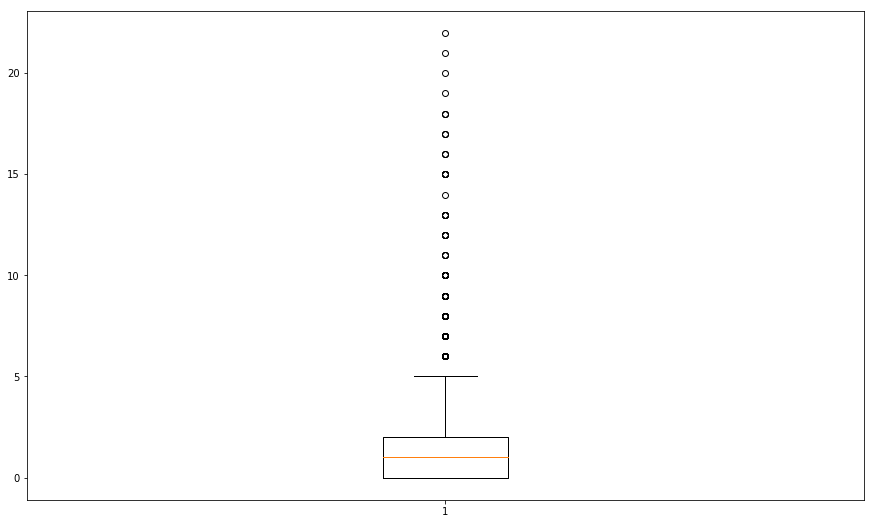

In [8]:
#identifying outliers(the values which are away from the plot are outliers in this case)
plt.boxplot(pima.away_score)

In [9]:
m = sum(pima.home_score) / len(pima.home_score)

In [10]:
var_res = sum([(xi - m) ** 2 for xi in pima.home_score]) / len(pima.home_score)

In [11]:
print("Variance_home_score", var_res)

Variance_home_score 2.96662758858


In [12]:
m = sum(pima.away_score) / len(pima.away_score)

In [13]:
var_res = sum([(xi - m) ** 2 for xi in pima.away_score]) / len(pima.away_score)

In [14]:
print("Variance_away_score", var_res)

Variance_away_score 1.95240363849


In [15]:
#Both Columns show some variance no column with zero variance.

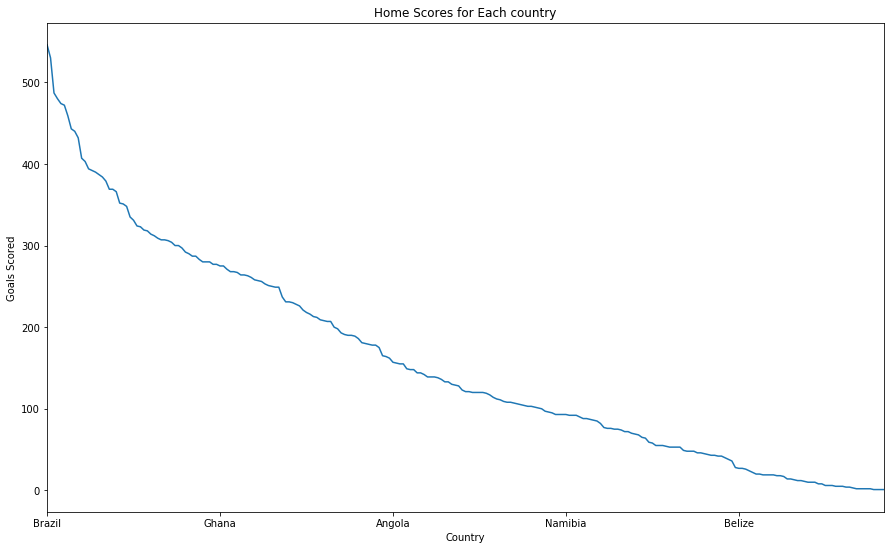

In [16]:
plt.title("Home Scores for Each country")
plt.xlabel("Country")
plt.ylabel("Goals Scored")

pima['home_team'].value_counts().plot("line")
#LinePLot

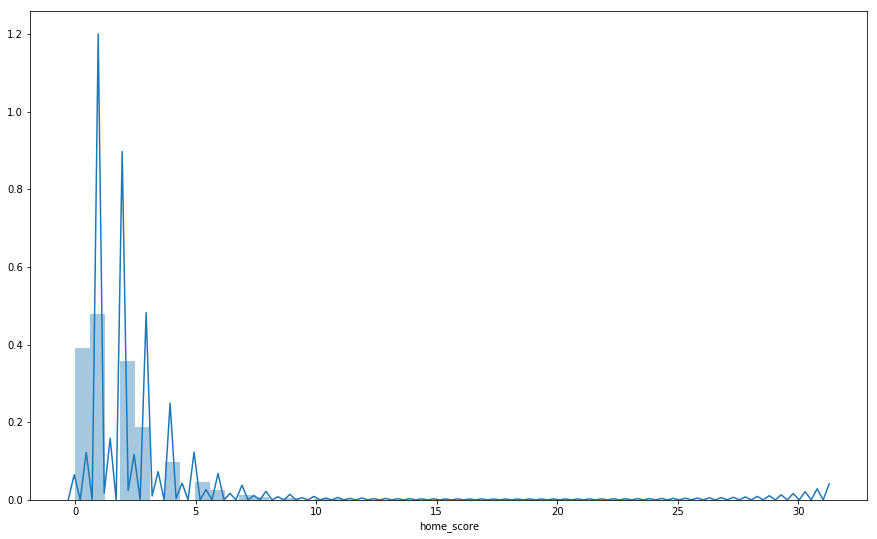

In [17]:
#DensityPLot of Home team score(HISTOGRAM)
sns.distplot(pima['home_score'])

In [18]:
#NumberSummaries
pima.describe()

,home_score,away_score
count,38685.000000,38685.000000
mean,1.729146,1.194752
std,1.722412,1.397302
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,22.000000


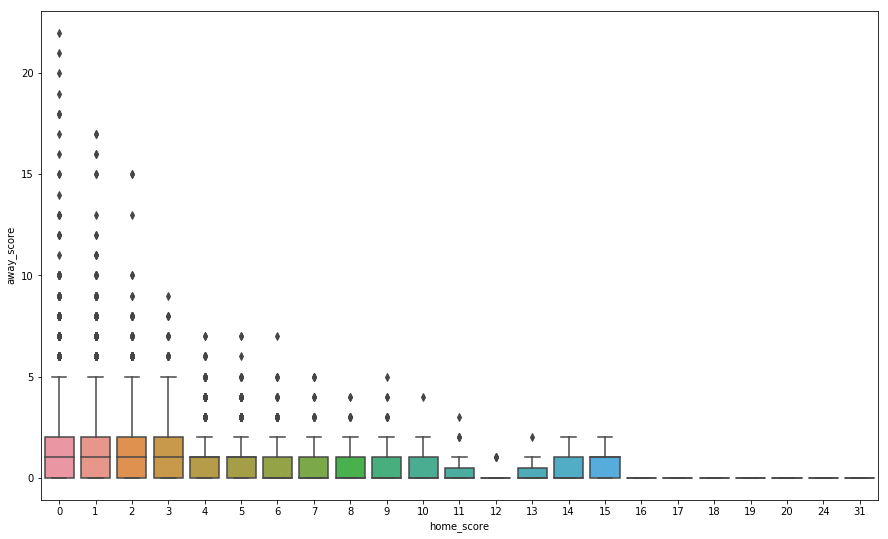

In [19]:
#boxplot between home team score an away team score
sns.boxplot(x="home_score", y="away_score", data=pima)

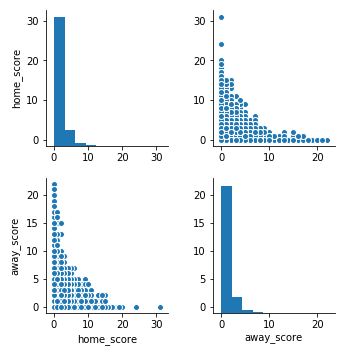

In [20]:
#pairplot for the dataser 
sns.pairplot(pima)

In [21]:
#goals scored in each country
pima.groupby('country')['home_score','away_score'].sum()

,home_score,away_score
country,,
Afghanistan,7,11
Albania,166,181
Algeria,359,152
Andorra,20,130
Angola,224,114
Anguilla,2,25
Antigua and Barbuda,189,114
Argentina,893,426
Armenia,85,116


In [22]:
#Maximum Number of goals scored on home ground
home_col=pima['home_score']
maxHomeGoals= np.where(home_col==max(pima['home_score']))

pima.iloc[maxHomeGoals]


,date,home_team,away_team,home_score,away_score,tournament,city,country
23571,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia


In [23]:
#Maximum Number of goals scored on Away ground
away_col=pima['away_score']
maxAwayGoals= np.where(away_col==max(pima['away_score']))

pima.iloc[maxAwayGoals]

,date,home_team,away_team,home_score,away_score,tournament,city,country
23568,2001-04-09,Tonga,Australia,0,22,FIFA World Cup qualification,Coffs Harbour,Australia


In [24]:
#Analysis for USA,Subset of intrest
USAGoals = pima.loc[pima['country'] == 'USA']
USAGoals.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country
41,1885-11-28,USA,Canada,0,1,Friendly,Newark,USA
48,1886-11-25,USA,Canada,3,2,Friendly,Newark,USA
904,1925-11-08,USA,Canada,6,1,Friendly,New York,USA
989,1926-11-06,USA,Canada,6,2,Friendly,New York,USA
1745,1935-05-19,USA,Scotland,1,5,Friendly,New York,USA


In [26]:
#to calculate correlation
pima.corr()

,home_score,away_score
home_score,1.000000,-0.131301
away_score,-0.131301,1.000000
